# Test ML NaN

### Test sur vote_average

In [18]:
import pandas as pd
file_path = r"C:\Users\Lulu\Documents\Git\Projet_2\df_clean\full_df.csv"
 # Lire le fichier CSV
df_full = pd.read_csv(file_path, sep='\t')
df_full.head(100)

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,backdrop_path,budget,original_language,popularity,poster_path,production_countries,release_date,revenue,spoken_languages,status,video,vote_average,vote_count,production_companies_name,production_companies_country
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,['US'],1897-01-01,0.0,['xx'],Released,False,5.526,20.0,['Veriscope Company'],NaN
2,tt0000502,Bohemios,Bohemios,1905.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70.0,/6vI31TbqaSLXNVVZhm1WGrATijZ.jpg,0.0,en,1.672,/4CHQV5nRoHwpaS8LaGNxTh8V0ad.jpg,['AU'],1906-12-26,0.0,['xx'],Released,False,5.375,28.0,"['Johnson and Gibson', 'J. & N. Tait']","['', '']"
4,tt0000591,The Prodigal Son,L'enfant prodigue,1907.0,90.0,NaN,0.0,fr,0.600,NaN,['FR'],1907-06-19,0.0,['xx'],Released,False,0.000,0.0,['Pathé Frères'],['FR']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt0001785,The Miner's Curse,The Miner's Curse,1911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,tt0001790,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,1913.0,60.0,NaN,0.0,en,0.874,NaN,['FR'],1913-01-01,0.0,['fr'],Released,False,1.000,1.0,['Pathé Frères'],NaN
97,tt0001803,The Mystery of a Hansom Cab,The Mystery of a Hansom Cab,1911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,tt0001812,Oedipus Rex,Oedipus Rex,1911.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


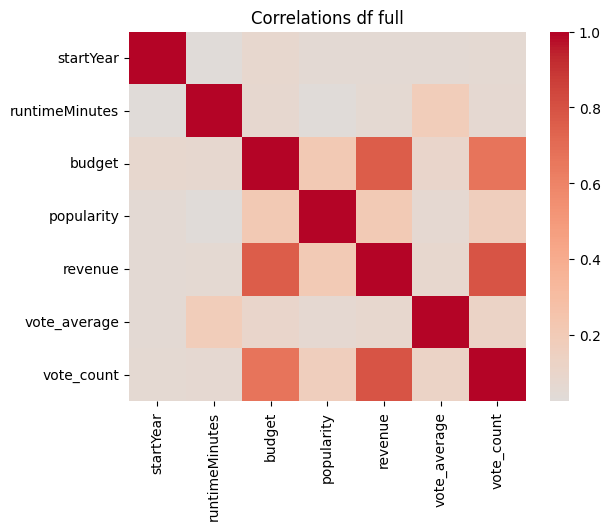

In [19]:
# Calcul correlation 
import seaborn as sns
import matplotlib.pyplot as plt

df_full1 = df_full.select_dtypes(include=[float, int])

corr_matrix = df_full1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center = 0)
plt.title("Correlations df full")
plt.show()

In [20]:
# Comptage Nan dans vote average
df_full['vote_average'].isna().value_counts()

vote_average
True     351310
False    167949
Name: count, dtype: int64

In [21]:
# Nettoyage des nan pour le ML
df_clean = df_full.dropna()
df_clean['vote_average'].isna().value_counts()

vote_average
False    35582
Name: count, dtype: int64

In [22]:
# Creation df ou les valeures nulles de vote average serons remplacees

df_nan = df_full[df_full['vote_average'].isna()]
#df_nan = df2018.isna()
df_nan['vote_average'].isna().sum()

np.int64(351310)

## Entrainement du modele 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Elimination des colonnes string et garder aue les int 
X = df_clean.drop(columns=['tconst', 'primaryTitle', 'originalTitle', 'backdrop_path', 'original_language', 'poster_path',
                           'production_countries', 'release_date', 'status', 'spoken_languages', 'video', 'vote_average',
                            'production_companies_name', 'production_companies_country'])
y= df_clean['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle = True, random_state=42)

modelRL2 = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", modelRL2.score(X_train, y_train))
print("Score for the Test dataset :", modelRL2.score(X_test, y_test))


Score for the Train dataset : 0.1010555430138319
Score for the Test dataset : 0.09290823646533941


Je constate que le score est vraiment mauvais, il faut donc transformer certaines colonnes avec des get_dummies serait une idee. 